In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Data_clening_functions as clean

pd.set_option("display.max_columns", None)
train_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/train.csv"
)
test_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/test.csv"
)

/tmp/ipykernel_58922/568409263.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
numerical_features = train_df[
    [
        "LotArea",
        "OverallQual",
        "YearBuilt",
        "YearRemodAdd",
        "GarageYrBlt",
        "FullBath",
        "TotalBsmtSF",
        "Fireplaces",
        "TotRmsAbvGrd",
        "GrLivArea",
        "GarageArea",
        "GarageCars",
        "SalePrice",
    ]
]


test_df = test_df[
    [
        "LotArea",
        "OverallQual",
        "YearBuilt",
        "YearRemodAdd",
        "GarageYrBlt",
        "FullBath",
        "TotalBsmtSF",
        "Fireplaces",
        "TotRmsAbvGrd",
        "GrLivArea",
        "GarageArea",
        "GarageCars",
        "SalePrice",
    ]
]

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. renaming:
            </span>   
        </font>    
</h2>


In [3]:
numerical_features = clean.rename_columns(numerical_features)
test_df = clean.rename_columns(test_df)

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. fill missing values:
            </span>   
        </font>    
</h2>


In [4]:
numerical_features = clean.missing_values(numerical_features)
test_df = clean.missing_values(test_df)

In [5]:
numerical_features = numerical_features.merge(test_df, "outer")

/tmp/ipykernel_58922/2619914138.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  numerical_features = numerical_features.merge(test_df, "outer")


In [6]:
for col in numerical_features.columns:
    numerical_features[col] = numerical_features[col].astype({col: "int32"})
numerical_features

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,Total_rooms,grade_living_area,garage_area,garage_capacite,SalePrice
0,1300,6,1980,1980,1980,1,561,1,5,1229,462,2,124000
1,1470,4,1970,1970,1977,1,630,0,3,630,0,0,137402
2,1476,4,1970,1970,1977,1,546,0,5,1092,0,0,159270
3,1477,4,1970,1970,1970,1,630,0,3,630,286,1,80000
4,1477,6,1970,2007,1977,2,546,0,6,1092,0,0,161067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,70761,7,1975,1975,1975,2,1533,2,5,1533,576,2,280000
2915,115149,7,1971,2002,1971,2,1643,2,5,1824,739,2,302000
2916,159000,6,1958,2006,1958,2,1444,2,7,2144,389,2,277000
2917,164660,5,1965,1965,1965,2,1499,2,7,1786,529,2,228950


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Outliers:
            </span>   
        </font>    
</h2>


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.1 SalePrice :
            </span>   
        </font>    
</h3>


555259.2840000003
79000.0


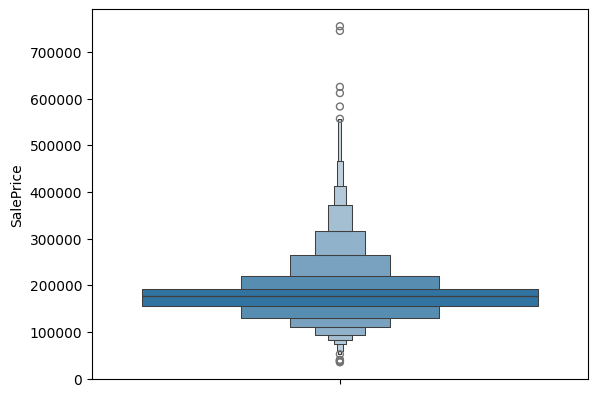

In [12]:
sns.boxenplot(numerical_features["SalePrice"])

print(numerical_features["SalePrice"].quantile(0.998))
print(numerical_features["SalePrice"].quantile(0.01))

In [13]:
Q1 = numerical_features["SalePrice"].quantile(0.01)
Q2 = numerical_features["SalePrice"].quantile(0.998)

df = clean.remove_outliers_quantile(Q1, Q2, "SalePrice", numerical_features)

35


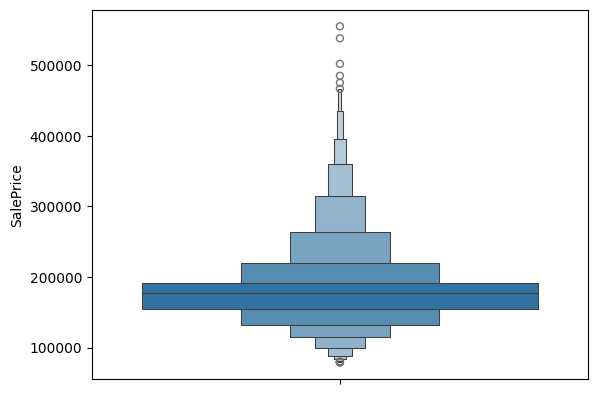

In [14]:
sns.boxenplot(df["SalePrice"])
feature = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.2 year_built:
            </span>   
        </font>    
</h3>


2009.0820000000003
1904.36


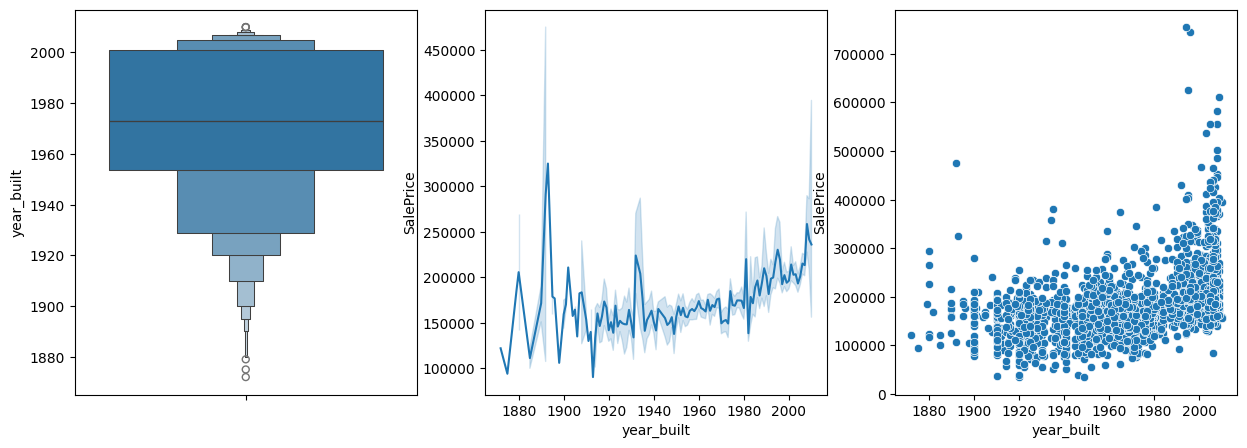

In [15]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["year_built"], ax=axe[0])
sns.lineplot(
    x=numerical_features["year_built"], y=numerical_features["SalePrice"], ax=axe[1]
)
sns.scatterplot(
    x=numerical_features["year_built"], y=numerical_features["SalePrice"], ax=axe[2]
)

print(numerical_features["year_built"].quantile(0.999))
print(numerical_features["year_built"].quantile(0.02))

In [17]:
Q1 = numerical_features["year_built"].quantile(0.02)
Q2 = numerical_features["year_built"].quantile(0.999)

df = clean.remove_outliers_quantile(Q1, Q2, "year_built", feature)
numerical_features = df

118


2009.0
1919.0


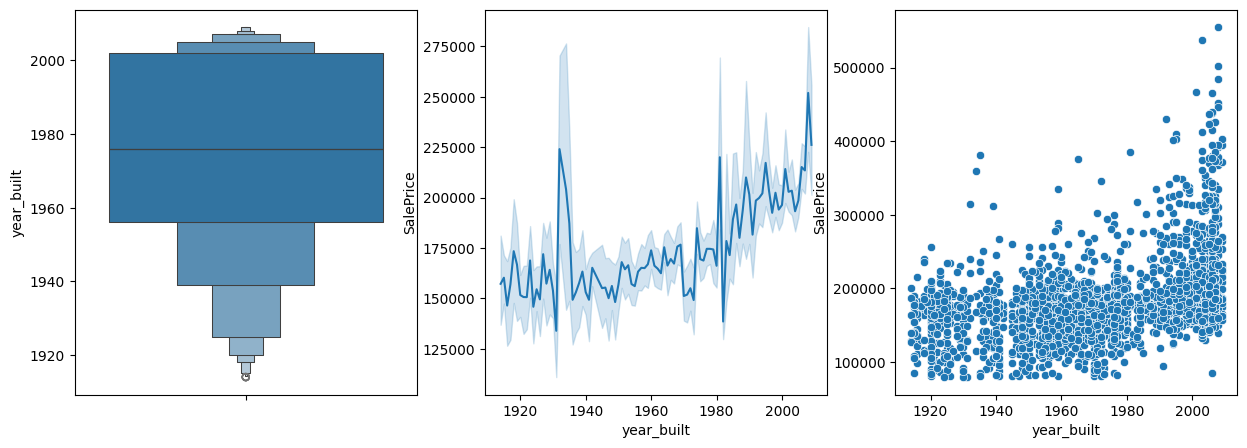

In [18]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["year_built"], ax=axe[0])
sns.lineplot(
    x=numerical_features["year_built"], y=numerical_features["SalePrice"], ax=axe[1]
)
sns.scatterplot(
    x=numerical_features["year_built"], y=numerical_features["SalePrice"], ax=axe[2]
)

print(numerical_features["year_built"].quantile(0.999))
print(numerical_features["year_built"].quantile(0.02))

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.3 year_remodel_add:
            </span>   
        </font>    
</h3>


2010.0
1950.0


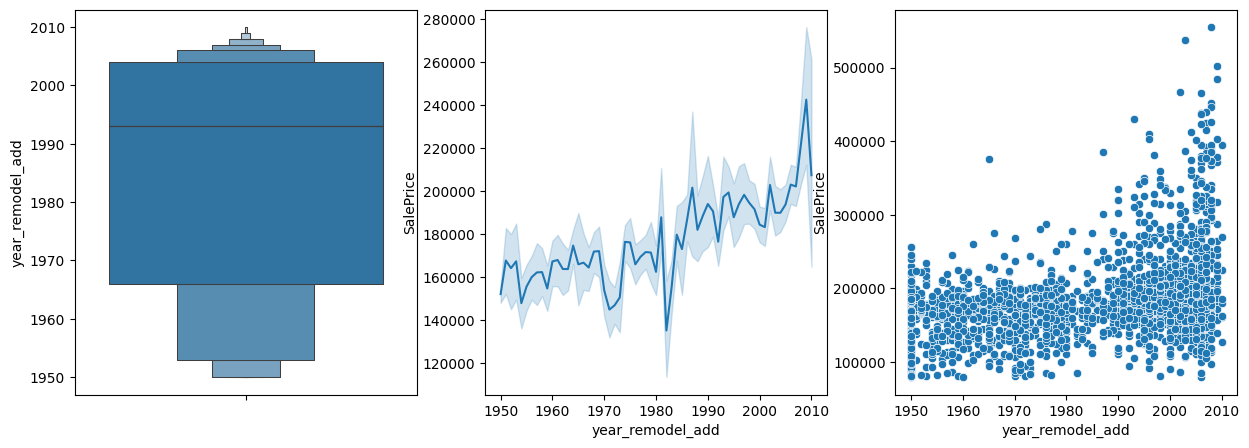

In [19]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["year_remodel_add"], ax=axe[0])
sns.lineplot(
    x=numerical_features["year_remodel_add"],
    y=numerical_features["SalePrice"],
    ax=axe[1],
)
sns.scatterplot(
    x=numerical_features["year_remodel_add"],
    y=numerical_features["SalePrice"],
    ax=axe[2],
)

print(numerical_features["year_remodel_add"].quantile(0.999))
print(numerical_features["year_remodel_add"].quantile(0.02))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: No Outliers</b><br>
    </span>    
</div>


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.4 garage_year_build:
            </span>   
        </font>    
</h3>


2010.0
1914.0


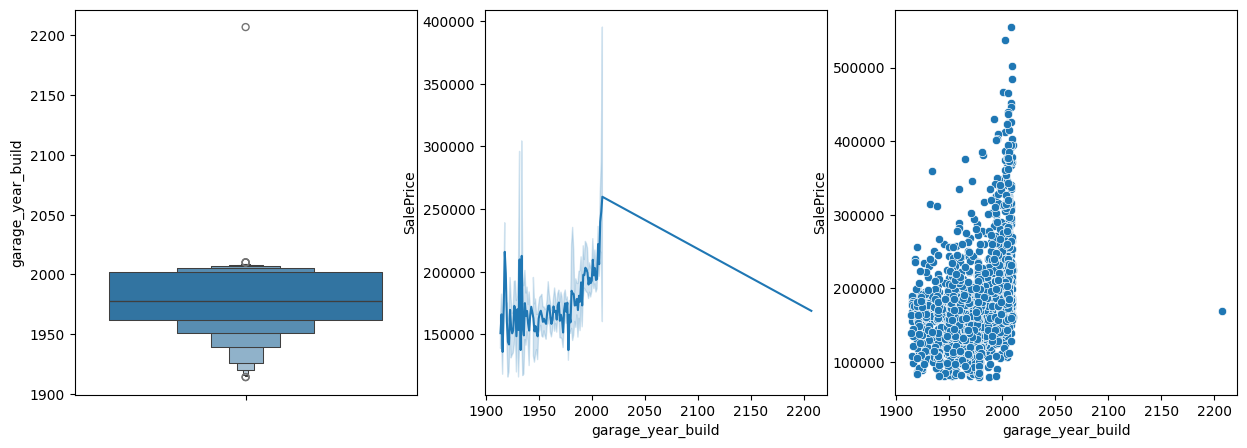

In [20]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["garage_year_build"], ax=axe[0])
sns.lineplot(
    x=numerical_features["garage_year_build"],
    y=numerical_features["SalePrice"],
    ax=axe[1],
)
sns.scatterplot(
    x=numerical_features["garage_year_build"],
    y=numerical_features["SalePrice"],
    ax=axe[2],
)

print(numerical_features["garage_year_build"].quantile(0.999))
print(numerical_features["garage_year_build"].quantile(0.0))

The dot on the far right is alone because it feels sad


In [21]:
Q1 = numerical_features["garage_year_build"].quantile(0.00)
Q2 = numerical_features["garage_year_build"].quantile(0.999)

df = clean.remove_outliers_quantile(Q1, Q2, "garage_year_build", numerical_features)
numerical_features = df

1


2009.2360000000003
1914.0


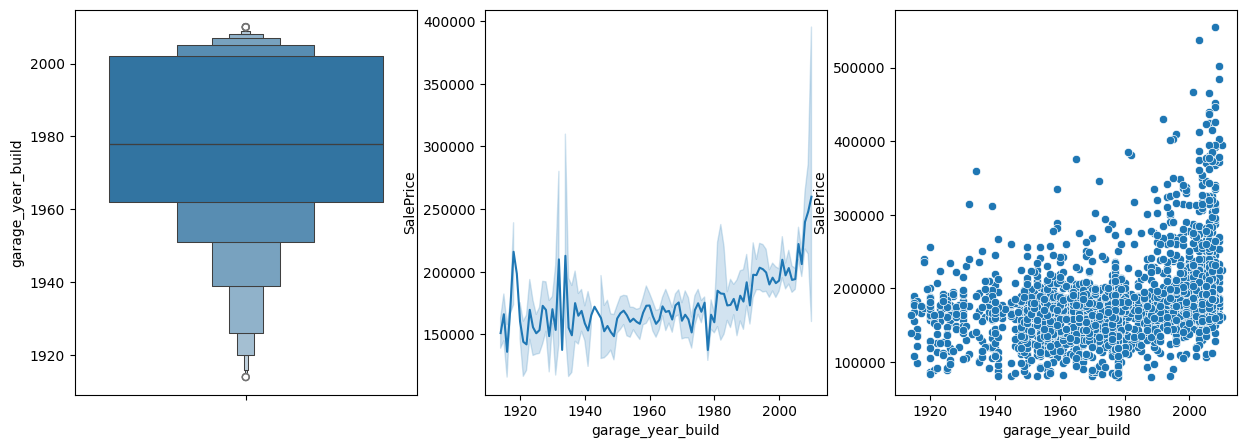

In [22]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["garage_year_build"], ax=axe[0])
sns.lineplot(
    x=numerical_features["garage_year_build"],
    y=numerical_features["SalePrice"],
    ax=axe[1],
)
sns.scatterplot(
    x=numerical_features["garage_year_build"],
    y=numerical_features["SalePrice"],
    ax=axe[2],
)

print(numerical_features["garage_year_build"].quantile(0.999))
print(numerical_features["garage_year_build"].quantile(0.0))

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.5 basement_area:
            </span>   
        </font>    
</h3>


2177.8400000000024
0.0


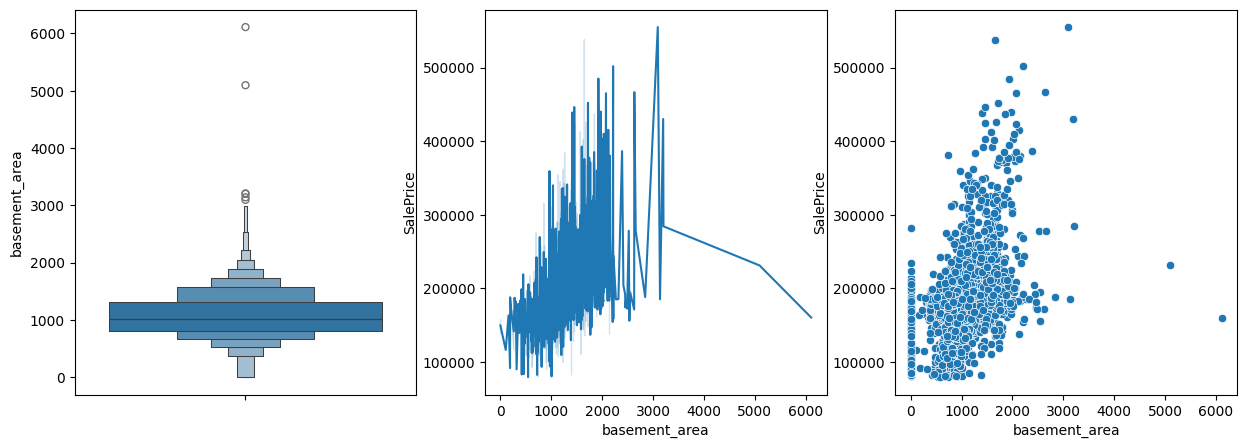

In [23]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["basement_area"], ax=axe[0])
sns.lineplot(
    x=numerical_features["basement_area"], y=numerical_features["SalePrice"], ax=axe[1]
)
sns.scatterplot(
    x=numerical_features["basement_area"], y=numerical_features["SalePrice"], ax=axe[2]
)

print(numerical_features["basement_area"].quantile(0.99))

print(numerical_features["basement_area"].quantile(0.01))

In [24]:
Q1 = numerical_features["basement_area"].quantile(0.026)
Q2 = numerical_features["basement_area"].quantile(0.99)
df = clean.remove_outliers_quantile(Q1, Q2, "basement_area", numerical_features)

100


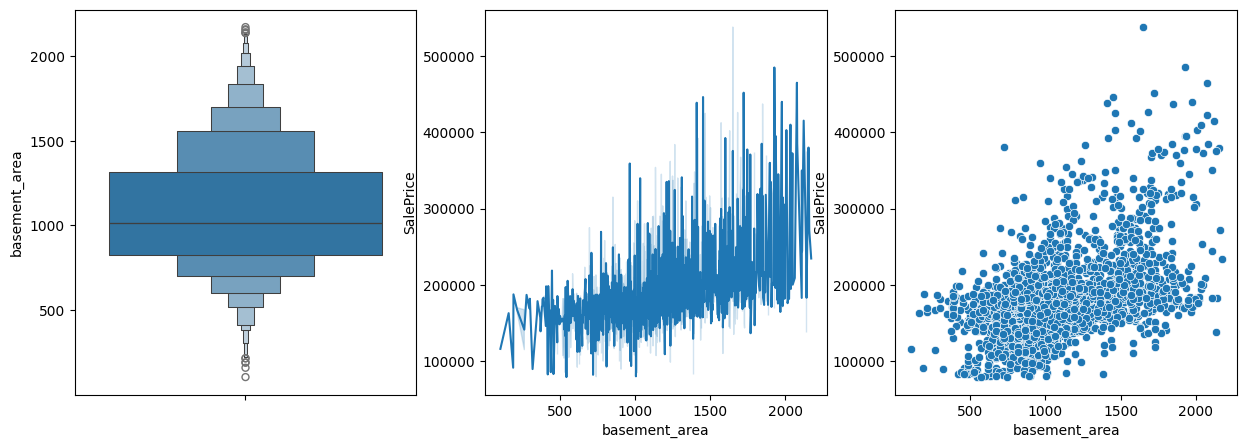

In [25]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["basement_area"], ax=axe[0])
sns.lineplot(x=df["basement_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["basement_area"], y=df["SalePrice"], ax=axe[2])

numerical_features = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.6 grade_living_area:
            </span>   
        </font>    
</h3>


2690.0
600.968


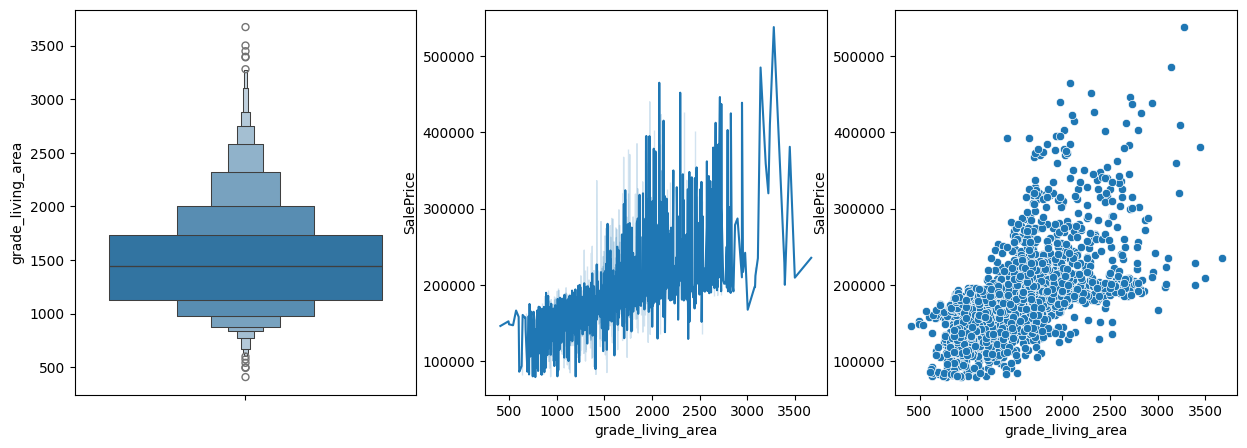

In [26]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["grade_living_area"], ax=axe[0])
sns.lineplot(
    x=numerical_features["grade_living_area"],
    y=numerical_features["SalePrice"],
    ax=axe[1],
)
sns.scatterplot(
    x=numerical_features["grade_living_area"],
    y=numerical_features["SalePrice"],
    ax=axe[2],
)

print(numerical_features["grade_living_area"].quantile(0.98))

print(numerical_features["grade_living_area"].quantile(0.002))

In [27]:
Q1 = numerical_features["grade_living_area"].quantile(0.002)
Q2 = numerical_features["grade_living_area"].quantile(0.98)
df = clean.remove_outliers_quantile(Q1, Q2, "grade_living_area", numerical_features)

59


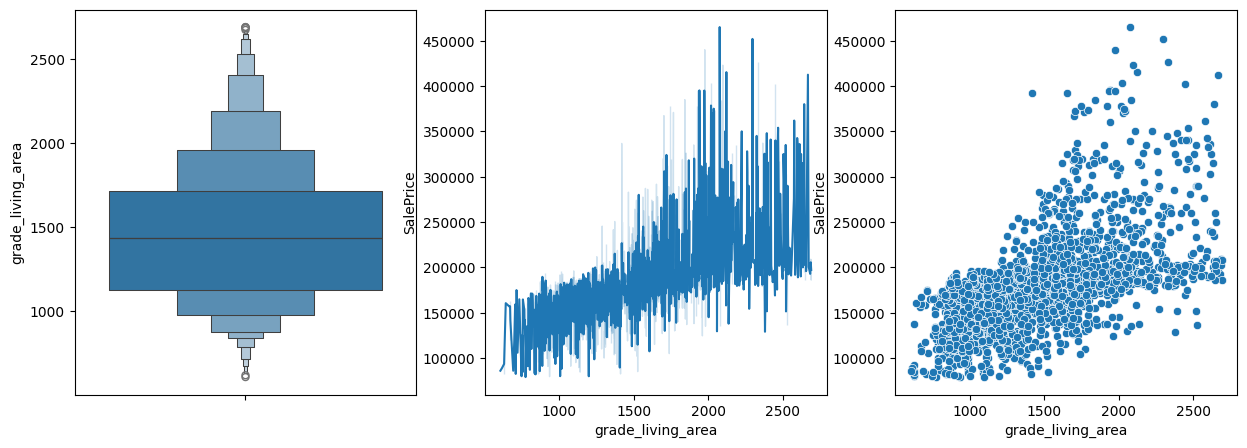

In [28]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["grade_living_area"], ax=axe[0])
sns.lineplot(x=df["grade_living_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["grade_living_area"], y=df["SalePrice"], ax=axe[2])
numerical_features = df

In [29]:
numerical_features.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/Data_set.csv"
)

In [30]:
numerical_features

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,Total_rooms,grade_living_area,garage_area,garage_capacite,SalePrice
0,1300,6,1980,1980,1980,1,561,1,5,1229,462,2,124000
1,1470,4,1970,1970,1977,1,630,0,3,630,0,0,137402
2,1476,4,1970,1970,1977,1,546,0,5,1092,0,0,159270
3,1477,4,1970,1970,1970,1,630,0,3,630,286,1,80000
4,1477,6,1970,2007,1977,2,546,0,6,1092,0,0,161067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,70761,7,1975,1975,1975,2,1533,2,5,1533,576,2,280000
2915,115149,7,1971,2002,1971,2,1643,2,5,1824,739,2,302000
2916,159000,6,1958,2006,1958,2,1444,2,7,2144,389,2,277000
2917,164660,5,1965,1965,1965,2,1499,2,7,1786,529,2,228950
